In [1]:
library(readr)
library(lattice)

In [20]:
db_data <- read_csv("diabetes_merged.csv")
head(db_data)
nrow(db_data)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Diagnose = col_double(),
  `Age diagnosed` = col_double(),
  Prediabetes = col_double(),
  `Risk for DB` = col_double(),
  Gender = col_double(),
  Age = col_double(),
  `Race/Ethnicity` = col_double(),
  `Pregnancy status` = col_double(),
  Waist = col_double(),
  BMI = col_double(),
  `HDL Chol` = col_double(),
  `LDL Chol` = col_double(),
  HasHeartDisease = col_double(),
  Glucohem = col_double()
)




X1,Diagnose,Age diagnosed,Prediabetes,Risk for DB,Gender,Age,Race/Ethnicity,Pregnancy status,Waist,BMI,HDL Chol,LDL Chol,HasHeartDisease,Glucohem
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2,NA,2,2,1,52,1,NA,95.4,27.56,47,121,0,5.7
1,2,NA,2,2,1,21,4,NA,79.5,23.34,NA,NA,0,NA
2,2,NA,2,2,2,30,2,2,89.7,25.99,35,119,0,5.5
3,2,NA,2,2,2,61,1,NA,97.0,31.21,37,110,0,6.1
4,2,NA,2,2,1,27,5,NA,82.9,23.44,37,105,0,5.0
5,2,NA,2,2,2,40,1,2,109.2,36.59,62,106,0,5.4


[1] 2763

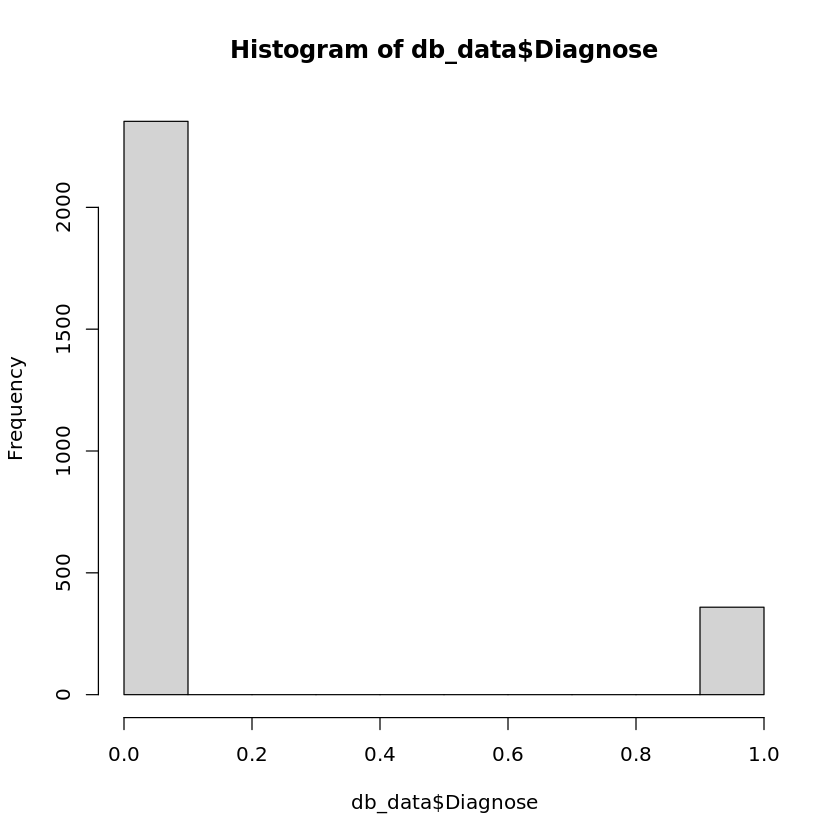

In [23]:
db_data<-db_data[!(db_data$Diagnose == 9 | db_data$Diagnose == 3),]
db_data$Diagnose[db_data$Diagnose==2] <- 0
hist(db_data$Diagnose)

# The effect of Glucohemoglobin

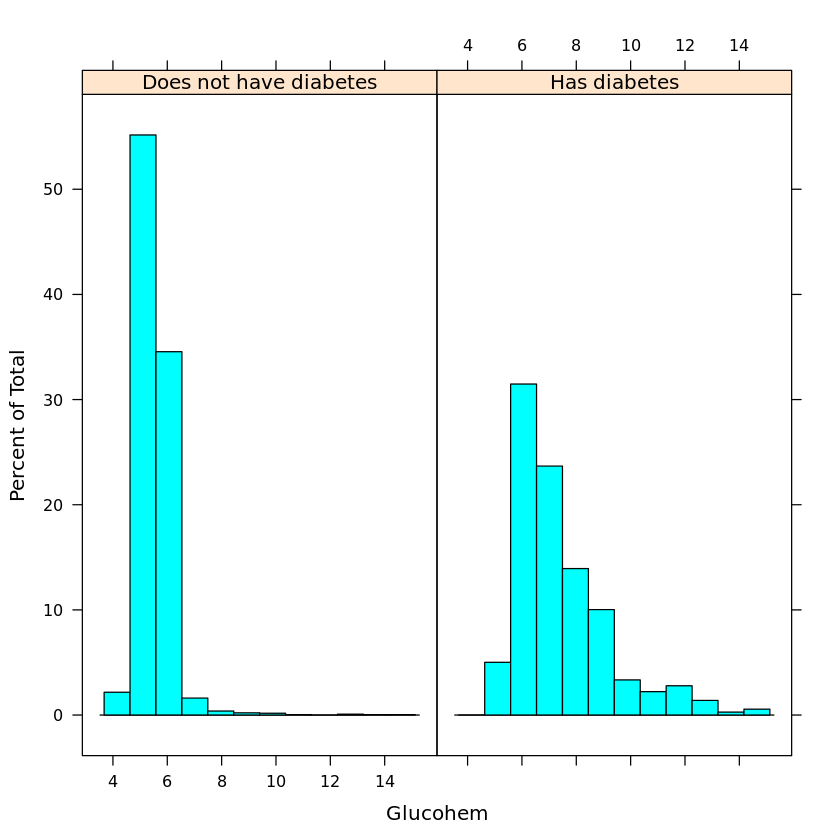

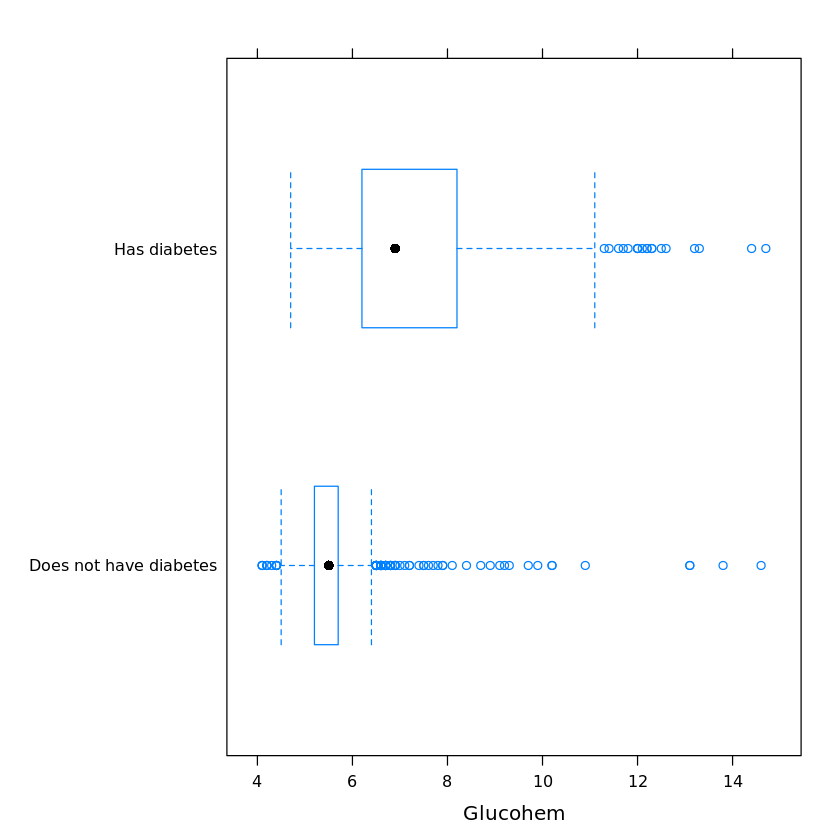

In [27]:
db_data1 <- db_data[,]
db_data1$Diagnose[db_data1$Diagnose==0] <- 'Does not have diabetes'
db_data1$Diagnose[db_data1$Diagnose==1] <- 'Has diabetes'
histogram(~ Glucohem|Diagnose, data = db_data1)
bwplot(Diagnose ~ Glucohem, data = db_data1)

# Waist

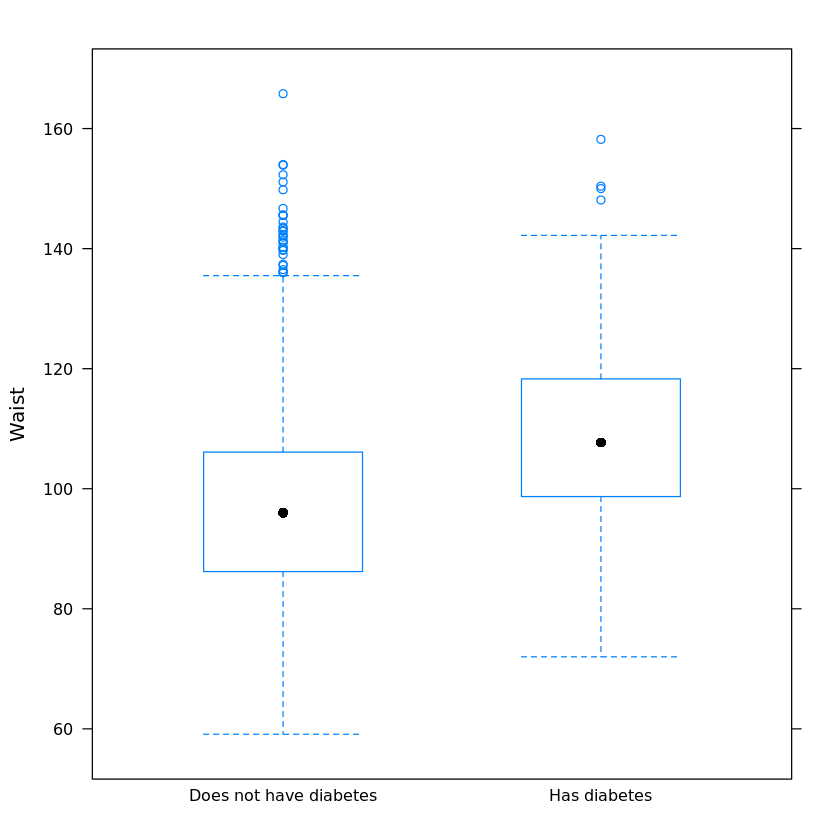

In [39]:
# histogram(~ Waist|Diagnose, data = db_data1)
bwplot(Waist ~ Diagnose, data = db_data1)

# BMI

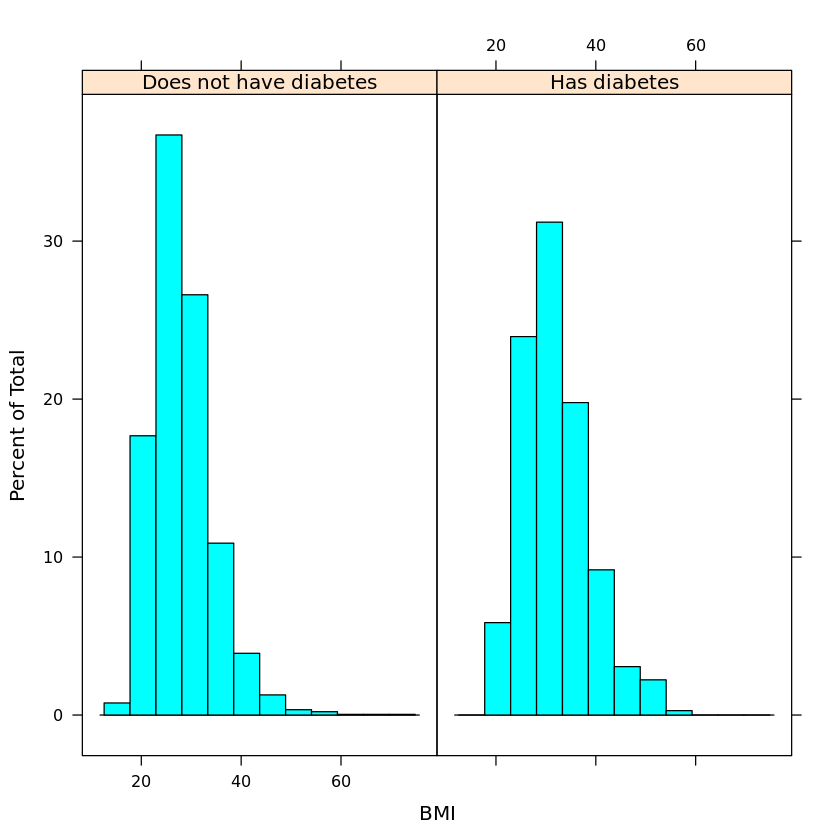

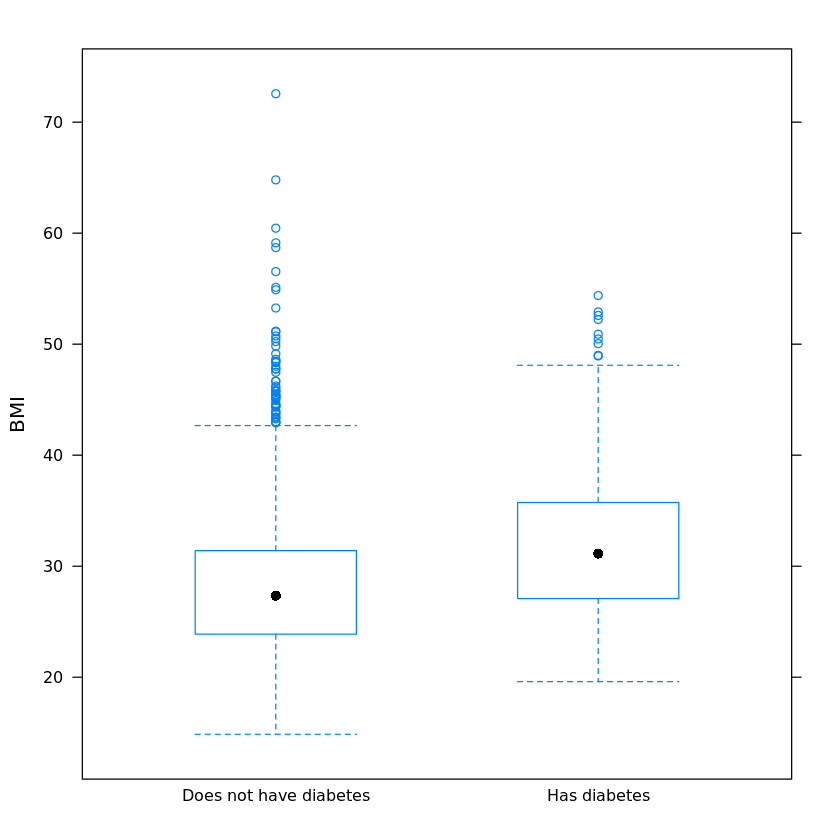

In [30]:
histogram(~ BMI|Diagnose, data = db_data1)
bwplot(BMI ~ Diagnose, data = db_data1)

# Heart desease

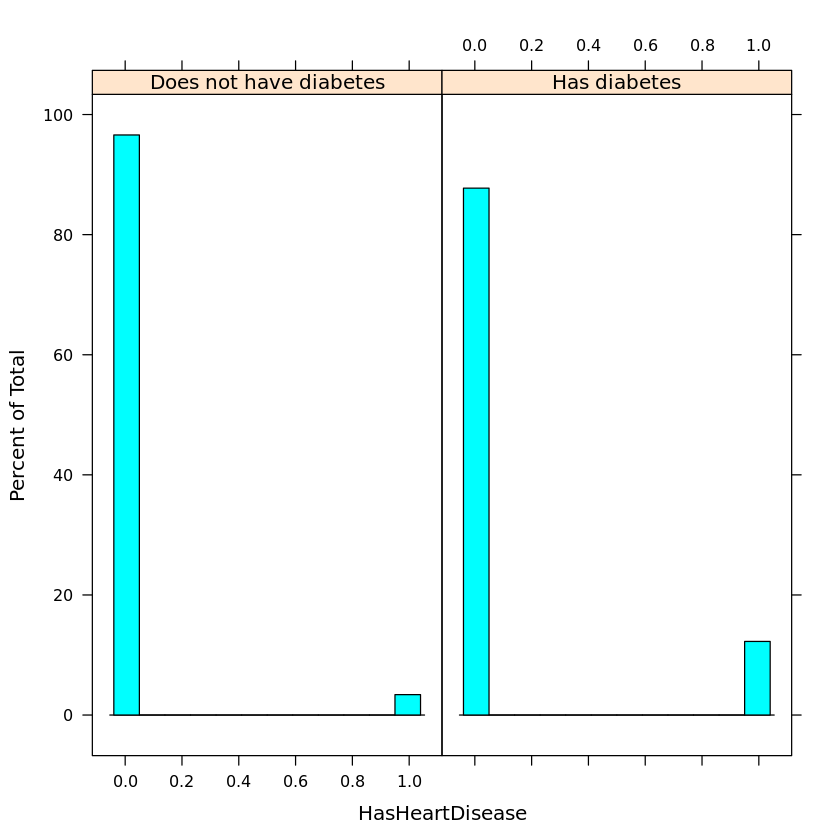

In [38]:
histogram(~ HasHeartDisease|Diagnose, data = db_data1)

In [44]:
table(db_data1$HasHeartDisease, db_data1$Diagnose)

   
    Does not have diabetes Has diabetes
  0                   2273          315
  1                     80           44

In [45]:
prop.test(x=c(44,315), n=c(124,2588), correct=FALSE, conf.level = 0.9, alternative = 'greater')


	2-sample test for equality of proportions without continuity
	correction

data:  c(44, 315) out of c(124, 2588)
X-squared = 55.993, df = 1, p-value = 3.637e-14
alternative hypothesis: greater
90 percent confidence interval:
 0.1774456 1.0000000
sample estimates:
   prop 1    prop 2 
0.3548387 0.1217156 


# HDL cholestirine

### HDL


	Welch Two Sample t-test

data:  HDL Chol by Diagnose
t = 5.6081, df = 481.58, p-value = 1.726e-08
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 3.625486      Inf
sample estimates:
mean in group Does not have diabetes           mean in group Has diabetes 
                            54.23070                             49.52941 


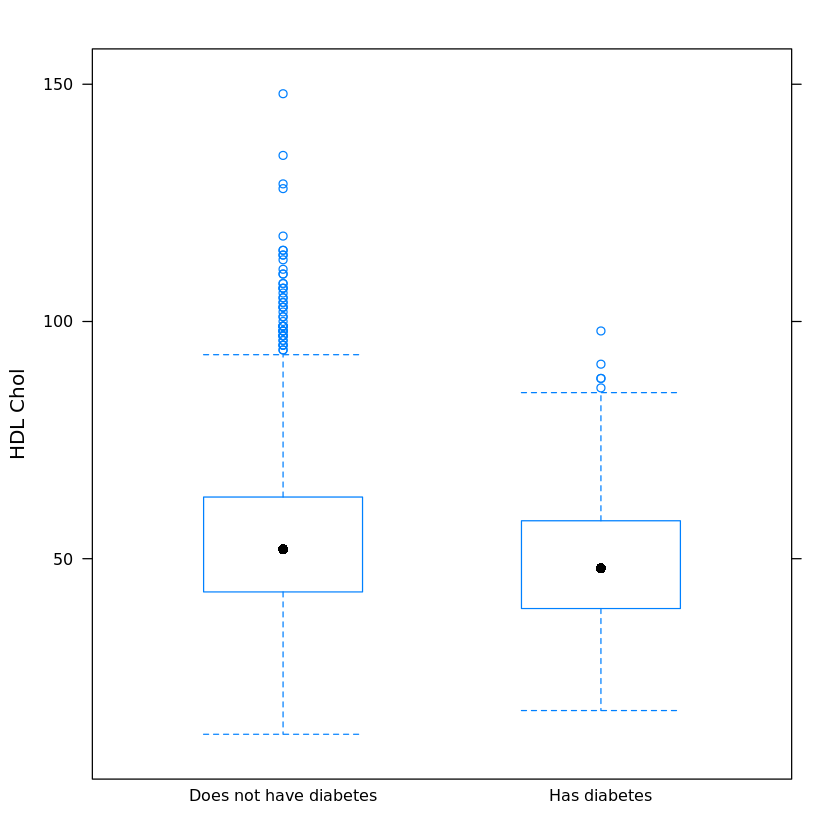

In [42]:
bwplot(`HDL Chol` ~ Diagnose, data = db_data1)
t.test(`HDL Chol` ~ Diagnose, data=db_data1, alternative="greater", conf.level=0.9)